## Problem Statement: 
### Predict the value(numerical) of claim based on a training set of historical data containing various features of each customer.
   

In [122]:
## Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor  

from sklearn.metrics import mean_squared_error,r2_score

In [261]:
# Reading the given training data (.csv file) into a pandas dataframe

data = pd.read_csv("CE802_P3_Data/CE802_P3_Data.csv")

# displaying first 5 rows of data
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [124]:
print(data.shape)

(1500, 17)


<b>Observations: </b>
- Independent varaibles : There are 16 Independent varaibles in the given data 
- Response variable :  The column 'Target' is the response variable
- The labels we are trying to predict are continuos values hence this is a regression problem


In [125]:
## printing the summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   int64  
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   object 
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [126]:
## printing statistical summary of the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,8.083320,5.787817,0.08,3.8900,6.830,10.9850,46.78
F2,1500.0,8.109187,5.812853,0.08,3.8150,6.740,10.9450,45.14
F3,1500.0,-185.816067,59.715228,-396.26,-227.5500,-185.910,-145.7200,51.62
F5,1500.0,-224.532120,87.920436,-493.59,-283.4700,-226.950,-166.4400,82.83
F6,1500.0,525.890600,126.724179,-317.01,465.8925,525.705,589.1100,1097.40
F7,1500.0,63.602773,774.154296,0.00,0.1300,1.010,6.8050,27474.53
F8,1500.0,117.038520,296.468097,-947.19,-87.9675,119.865,319.6675,1111.15
F9,1500.0,3.947333,1.836702,0.00,3.0000,4.000,5.0000,11.00
F10,1500.0,3.942667,1.810036,0.00,3.0000,4.000,5.0000,10.00
F11,1500.0,6.490307,6.080052,-13.64,2.5800,6.700,10.4500,25.90


## Exploratory Data Analysis (EDA)

- The main aim of EDA is to acquire more information about data given <br>
- Our EDA is mainly focussed on following tasks :

    1. Checking for missing Values
    2. Information About all the numerical variables
    3. Distribution of numerical variables
    4. Categorical variables
    5. Outliers
    6. Relationship between dependent variable and independent variables

#### Missing values in the data

In [127]:
## Finding the count of missing values in entire dataframe
print(data.isna().sum())

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64


In [128]:
## observation : There are no null values in the given dataset

#### Numerical variables

In [129]:
# list of numerical variables
## creating a list of column names who datatype is not ojbect.
numerical_variables   = [column for column in data.columns if data[column].dtypes != 'O']

print("Total number of numerical variables: {} ".format(len(numerical_variables)))

# visualizing numerical_variables
data[numerical_variables].head(3)

Total number of numerical variables: 15 


,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,-10526.01,-9.66,-29.10,1462.86,0.00


In [130]:
# numerical variables are ususally of 2 types: discrete and continuos

# list of discrete variables

## creating a list of column names where the the number of unique values in the column is lessthan 50
discrete_variables = [column for column in numerical_variables if data[column].nunique() < 50]

print("Number of discrete variables: {}".format(len(discrete_variables)))

# visualizing discrete_variables
data[discrete_variables].head(3)

Number of discrete variables: 2


,F9,F10
0,1,1
1,5,3
2,4,4


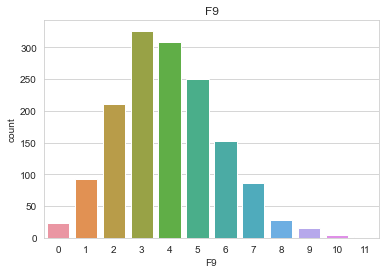

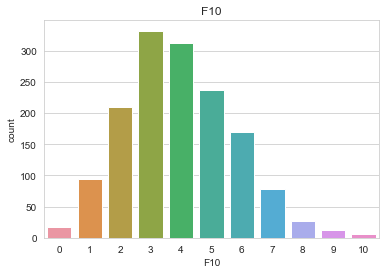

In [131]:
# visualising the discrete variables 
dat = data[['F9','F10']]
for variable in discrete_variables:
    # countplot shows the counts of observations in each categorical bin using bars.
    sns.countplot(x=variable,data=dat)
    plt.title(variable) 
    plt.xlabel(variable)
    plt.show()

In [132]:
# creating a list of continuos variables

continuos_variables = [column for column in numerical_variables if column not in discrete_variables]
print("Number of continuos_variables: {}".format(len(continuos_variables)))

# visualize continuos_variables
data[continuos_variables].head(3)

Number of continuos_variables: 13


,F1,F2,F3,F5,F6,F7,F8,F11,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,7.30,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,-1.28,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,8.28,-10526.01,-9.66,-29.10,1462.86,0.00


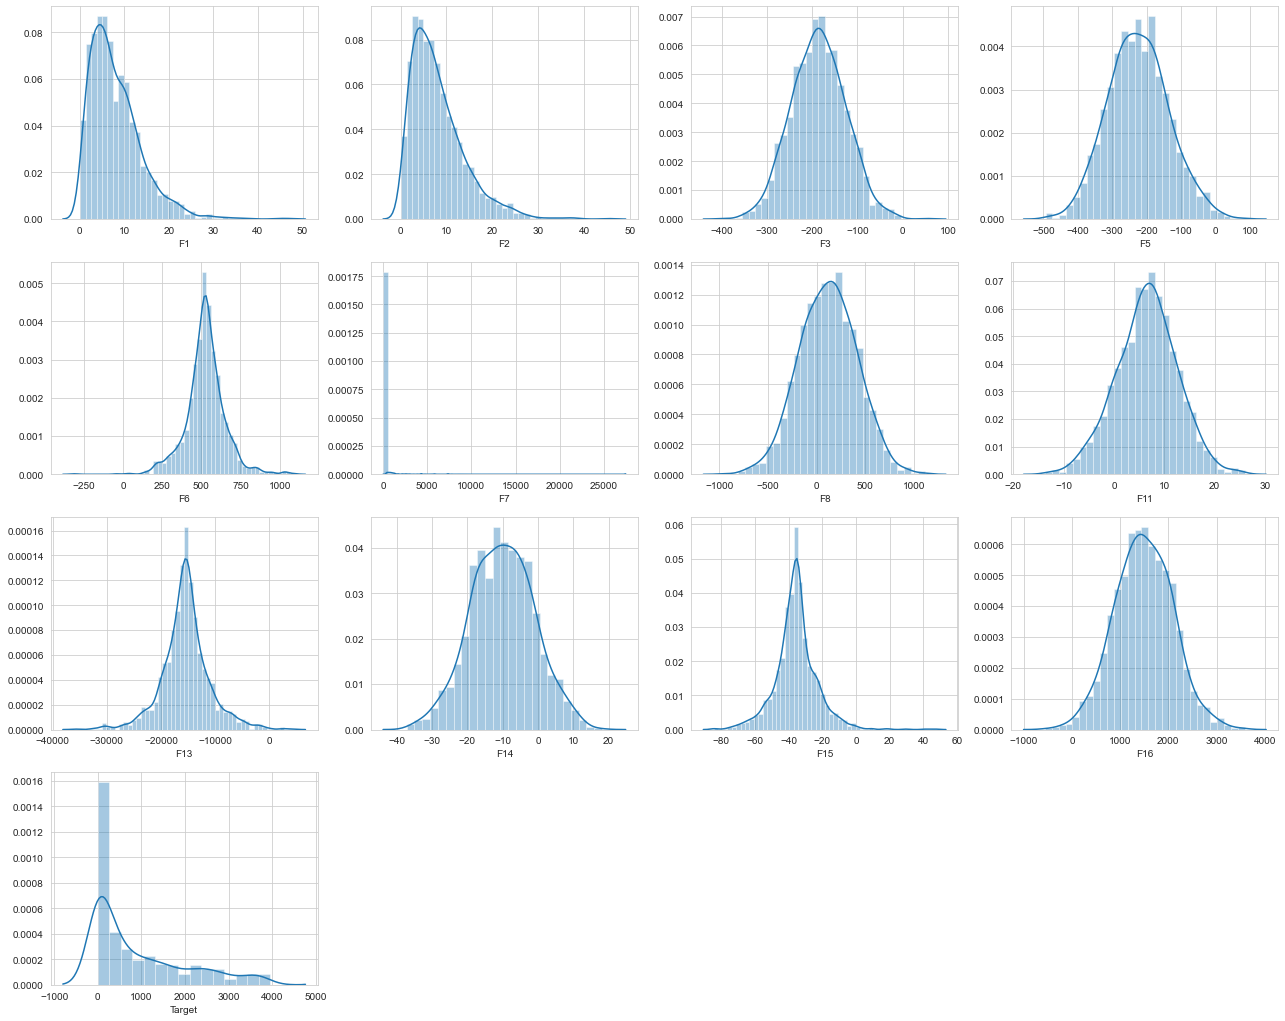

In [133]:
##visualizing continuos variables by creating ditributiong plot for each variable using seaborn distplot

plt.figure(figsize=(22,18))
plt_number = 1
dataset = data.copy()

for variable in continuos_variables:
    if plt_number <=16:
        ax = plt.subplot(4,4,plt_number)
        sns.distplot(dataset[variable])
    plt_number+=1
   

#### Categorical variables

In [134]:
# creating a list of categorical variables
categorical_variables = [column for column in data.columns if data[column].dtype == 'O']

print("Total number of  categorical variables: {}".format(len(categorical_variables)))

# visualizing the categorical variables
data[categorical_variables].head(3)

Total number of  categorical variables: 2


,F4,F12
0,Rest,High
1,Rest,Very low
2,UK,Low


In [135]:
# printing the cardinality of each categorical variable

for variable in categorical_variables:

    print("Feature : {}, " " number of categories : {}, " " category names: {}".format(variable,data[variable].nunique(),data[variable].unique()))

Feature : F4,  number of categories : 4,  category names: ['Rest' 'UK' 'USA' 'Europe']
Feature : F12,  number of categories : 5,  category names: ['High' 'Very low' 'Low' 'Very high' 'Medium']


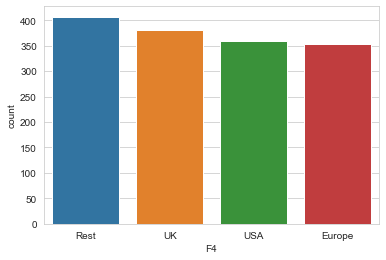

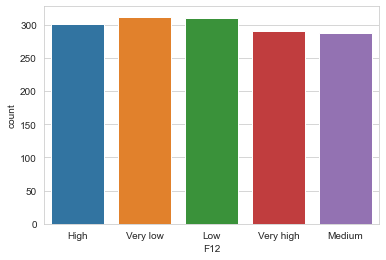

In [136]:
# using seaborn countplot visualizing the count of observations in each category
for variable in categorical_variables:
    
    sns.countplot(x=variable, data=data)
    plt.show()

### Outliers

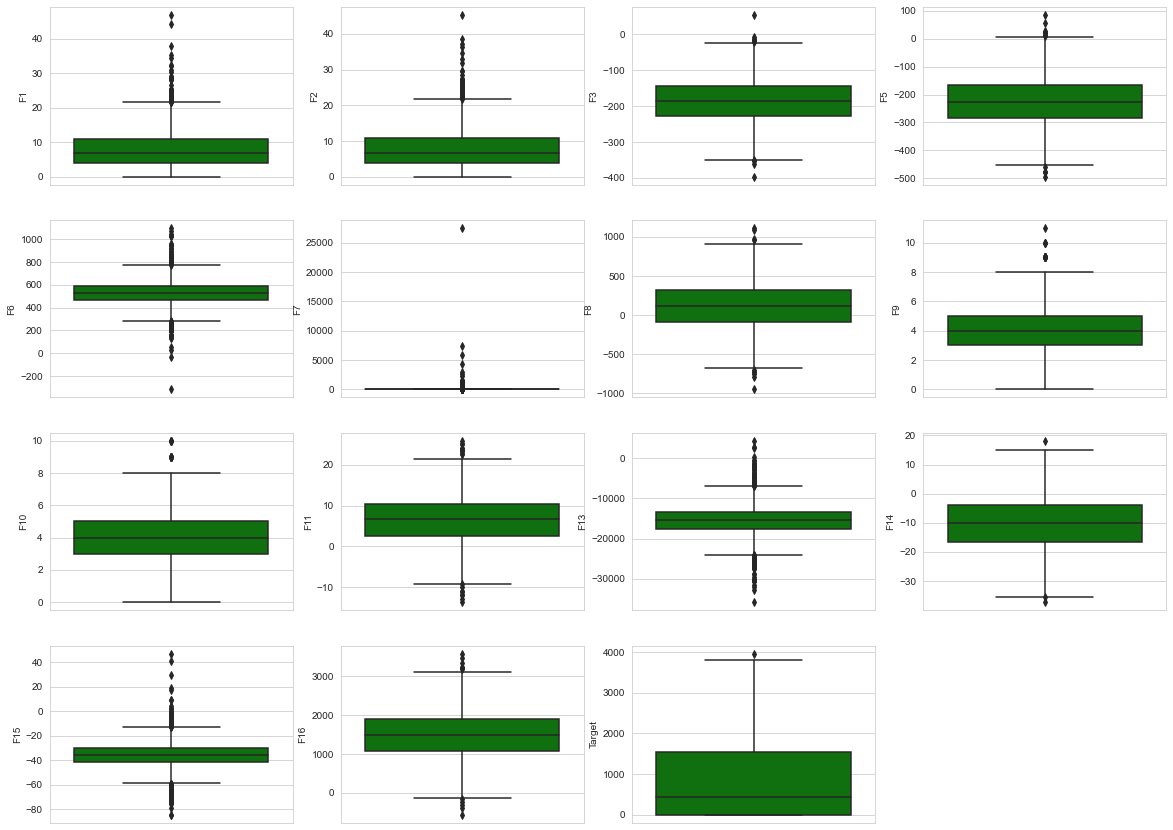

In [137]:
plt.figure(figsize=(20,15))
plt_number = 1
dataset = data.copy()

for variable in numerical_variables:
    if plt_number <=16:
        ax = plt.subplot(4,4,plt_number)
        sns.boxplot(data[variable],orient='v',color='g')
    plt_number+=1

### Visualising relationship between dependent variable and independent variables

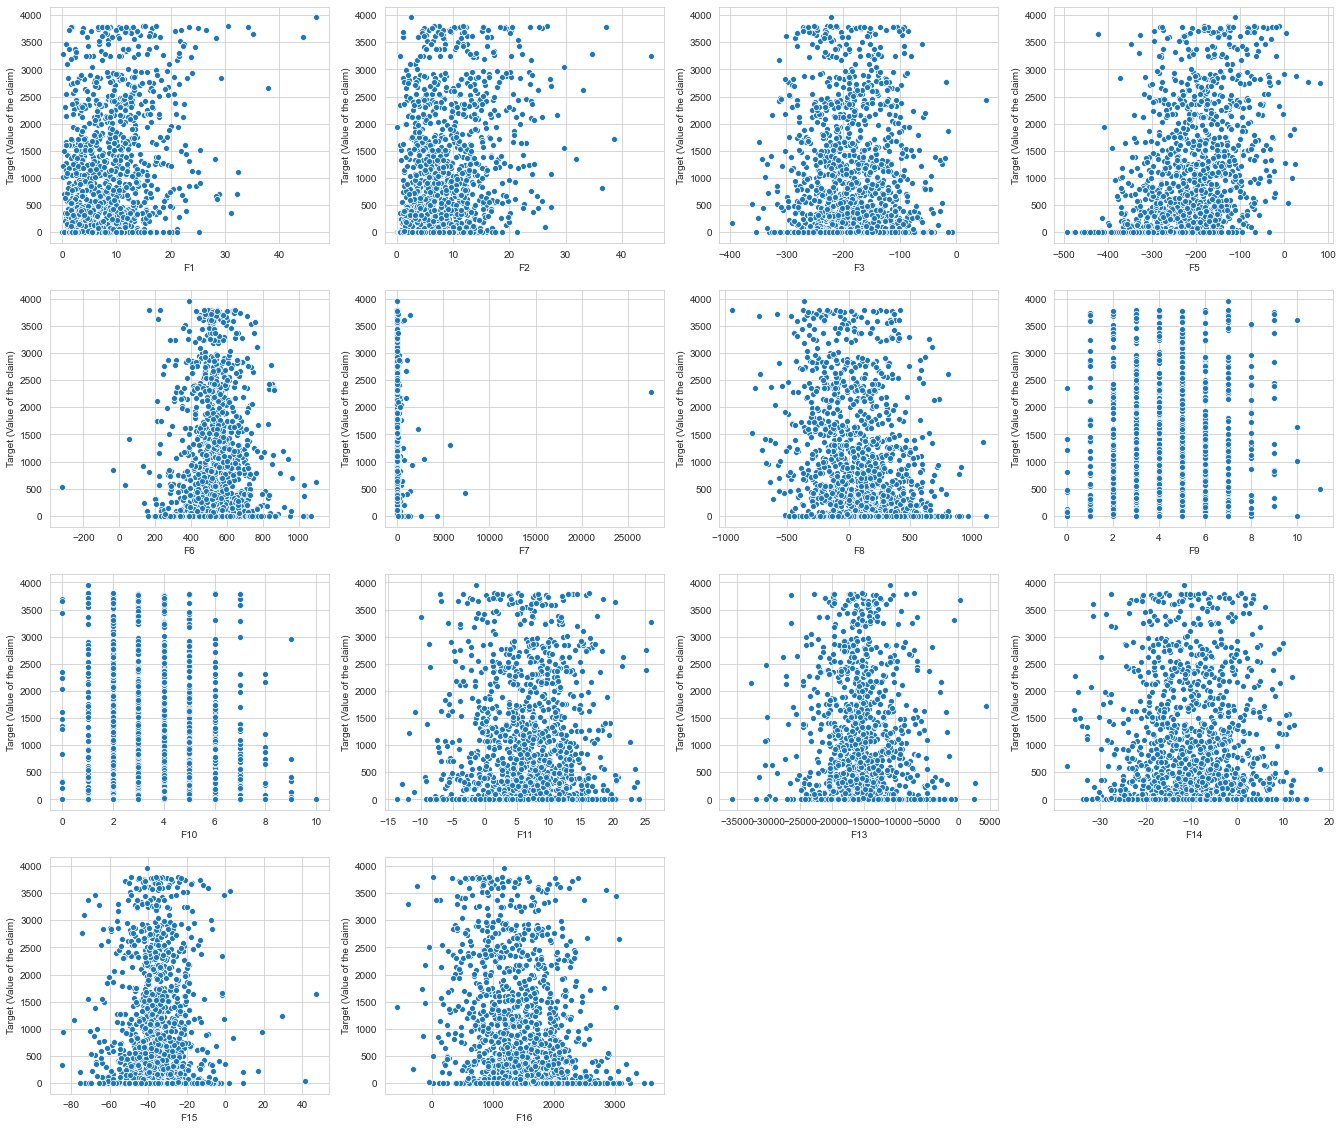

In [138]:
## visualising the relationship between continuos variables and target variable (claim value)
        
plt.figure(figsize=(23,20))
plt_number = 1

for variable in numerical_variables:
    if (variable != 'Target') and (plt_number <=16):
        ax = plt.subplot(4,4,plt_number)
        # using seaborn scatterplot to see the relationship between a feature and target
        sns.scatterplot(data[variable], data['Target'])
        plt.xlabel(variable)
        plt.ylabel('Target (Value of the claim)')
    plt_number+=1

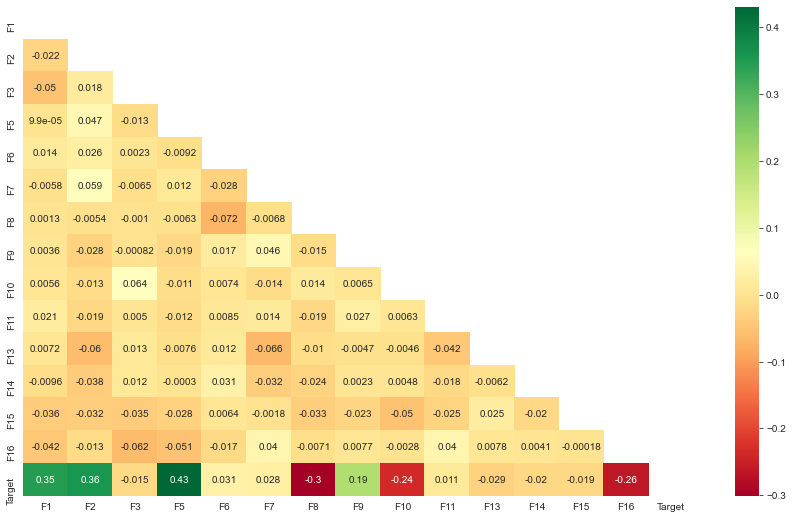

In [285]:
#### correlation between all the dependent variables and target variable

corr_all = data.corr()

plt.figure(figsize=(15,9))
mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_all,cmap='RdYlGn',annot=True,mask=mask)

In [140]:
corr_all.loc['Target',:].sort_values(ascending=False)[1:7]

F5    0.430990
F2    0.357137
F1    0.346373
F9    0.193704
F6    0.031407
F7    0.027713
Name: Target, dtype: float64

In [141]:
corr_all.loc['Target',:].sort_values(ascending=False)[-3:]

F10   -0.236200
F16   -0.263022
F8    -0.300890
Name: Target, dtype: float64

In [142]:
## separating features and response variable

# storing Class column in variable called y
y = data.Target

# # Storing all the columns otherthan Class in variable called X
X = data.drop(columns = 'Target')


In [143]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90


In [144]:
y.head()

0    3616.82
1    3342.88
2       0.00
3    1742.65
4     373.56
Name: Target, dtype: float64

In [145]:

## Splitting data : 80% for training and 20% for validation 
## random_state is set to 45 to get reproducible output across multiple function calls

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.20, 
                                                      random_state=45)

In [146]:
print("length of X_train : ",len(X_train))
print("length of X_valid, : ",len(X_valid))
print("length of y_train : ",len(y_train))
print("length of y_valid, : ",len(y_valid))

length of X_train :  1200
length of X_valid, :  300
length of y_train :  1200
length of y_valid, :  300


In [147]:
X_train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
838,10.88,0.78,-210.86,USA,-101.31,435.42,1.49,559.58,2,4,10.76,Very high,-18463.06,0.21,-35.61,2455.60
1445,3.92,6.32,-321.58,UK,-269.40,599.79,0.00,386.60,6,4,5.02,Medium,-15415.43,-5.91,-38.40,1160.82
1158,15.34,11.82,-251.62,Rest,-67.74,230.04,0.47,120.17,7,1,16.30,Very high,-15178.95,0.72,-48.99,1157.84
296,3.54,19.36,-179.80,Europe,-166.35,538.41,0.68,-285.83,3,4,10.86,High,-22322.76,-4.98,-31.62,1044.02
134,15.50,8.96,-164.92,USA,-156.36,563.07,1.40,-97.65,4,4,18.34,Very high,-15538.79,-3.06,-36.42,1643.44


# Creating machine learning models using LinearRegression, SupportVectorRegressor and RandomForestRegressor algorithms

<b>The following 3 steps will be common for all the models that are going to be built: </b>
- step1 : creating a pipeline for data preprocessing 
- step2 : Defining a cross-validation stragtegy using KFold crossvalidator
- step3 : Creating a function called gridsearch which takes a regressor, parameters for grid search and cross validator and    returns the best estimator

## Creating Pipelines for data processing

In [148]:
## selecting all the columns whose data type is numerical - int, float
numerical_features = data.iloc[:,:-1].select_dtypes(include=['int64','float64']).columns
## selecting the columns whose datatype is categorical - object
categorical_features = data.iloc[:,:-1].select_dtypes(include=['object']).columns

## Creating a Pipeline that scales the data using Robustscaler on numerical features
numerical_transformer = Pipeline([('scaler',RobustScaler())])

## Creating a pipeline that encodes categorical features as one-hot numeric array.
categorical_transformer = Pipeline([('encoder',OneHotEncoder(drop='first'))])

## Creating a fullpipeline which does both scaling and encoding on given data
## by combining the two pipelines created(numerical_transformer,categorical_transformer)
preprocess_pipe = ColumnTransformer(transformers = [
                                         ('numerical',numerical_transformer,numerical_features),
                                         ('categorical',categorical_transformer,categorical_features)
                                        ])


#The following Crossvalidation method will be used in all the models
# Kfold cross-validator with 10 folds
cv = KFold(n_splits=10)

In [149]:
## Creating a function to perform gridsearch

def gridsearch(regressor, grid_params, cv):
    
    """This function takes a regressor, parameters for grid search and cross validator as arguments
    and returns the regressor with high R^2 score"""
    
    ## estimator to gridsearch is a pipeline that performs data preprocesssing and applies a fit with the given regressor.
    model = GridSearchCV(
                            estimator  = Pipeline(steps=[('preprocessing',preprocess_pipe),('regressor',regressor)]),
                            param_grid = grid_params,  # perform gridsearch on grid parameters given
                            scoring    = 'r2',         # R^2 is used as scoring metric
                            n_jobs     = -1,           # n_jobs = -1,uses all the processors
                            cv         = cv,
                            verbose    = 2
                       )
    model.fit(X_train,y_train) # Fitting the training data on the best estimator returned by gridsearch.
    return model               # return the model

In [ ]:
# 3 dictionaries are created to store training accuracy, validation accuracy and RMSE value of each model.
results_training = {}
results_validation = {}
results_RMSE = {}

# Linear Regression

In [301]:

## parameters for performing gridsearch
grid_parameters = { 
                    'regressor__fit_intercept' : [True,False],      # fit intercept or not for the model
                    'regressor__normalize'     : [False]}           # since we are scaling the data, setting normalize = False

# Calling the function gridsearch with LinearRegression algorithm,grid_parameters and Cross validator,saving the model in a variable.

model = gridsearch(LinearRegression(),grid_parameters,cv)

## printing best Parameter setting that gave the best results on the hold out data.
print('Best Parameters : {}\n'.format(model.best_params_))

## calculating R^2 score on training data using final estimator returned by gridsearch
training_score_LinearReg = model.best_estimator_.score(X_train, y_train)
print('Training R^2    : {}\n'.format(training_score_LinearReg))

## calculating R^2 score on validation data using final estimator returned by gridsearch
validation_score_LinearReg = model.best_estimator_.score(X_valid, y_valid)
print('Validation R^2  : {}\n'.format(validation_score_LinearReg))

## making predictions on Validation data using the best estimator
y_predicted = model.best_estimator_.predict(X_valid)

## Calculating the root mean square error
mse=np.sum(np.square(y_valid-y_predicted))/len(y_predicted)
RMSE_LinearReg = np.sqrt(mse)
print('RMSE            :', RMSE_LinearReg)

LinearReg_BestEstimator = model.best_estimator_
#print(LinearReg_BestEstimator)

results_training['LinearRegression'] = [training_score_LinearReg]
results_validation['LinearRegression'] = [validation_score_LinearReg]
results_RMSE['LinearRegression'] = [RMSE_LinearReg]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    3.1s remaining:    0.7s


Best Parameters : {'regressor__fit_intercept': True, 'regressor__normalize': False}

Training R^2    : 0.7836010446586683

Validation R^2  : 0.818413506670992

RMSE            : 459.2209483019344


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.4s finished


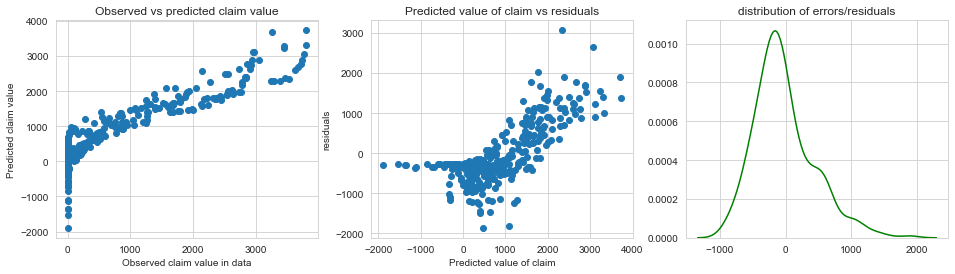

In [152]:
plt.figure(figsize=(16,4))
plt.subplot(131)
# plotting scatter plot between actual claim value and predicted claim value 
plt.scatter(y_valid, y_predicted)
plt.xlabel('Observed claim value in data')
plt.ylabel('Predicted claim value')
plt.title('Observed vs predicted claim value')

plt.subplot(132)
## scatter plot between predicted claim value and residuals
plt.scatter(y_predicted,delta_y)
plt.xlabel('Predicted value of claim')
plt.ylabel('residuals')
plt.title('Predicted value of claim vs residuals')

plt.subplot(133)
delta_y = y_valid -  y_predicted
sns.set_style('whitegrid')
# residual = actual -predicted. Calculating error and storing it in a variable called delta_y.
# plotting distribution of residuals using seaborn kde plot.
sns.kdeplot(np.array(delta_y),color='g')
plt.title('distribution of errors/residuals')
plt.show()

## SupportVectorRegressor(SVR)

In [153]:
## parameters for performing gridsearch

grid_parameters = { 
                    'regressor__C'       : np.logspace(-1,2,25),  
                    'regressor__epsilon' : [0.01,0.05,0.1,0.2,0.3,0.4,0.5],
                    'regressor__gamma'   : [1,0.1,0.01,0.001,0.0001], 
                    'regressor__kernel'  : ['linear', 'rbf']
            }

# Calling the function gridsearch with SVR algorithm,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(SVR(),grid_parameters,cv)


## printing best Parameter setting that gave the best results on the hold out data.
print('Best Parameters : {}\n'.format(model.best_params_))

## calculating R^2 score on training data using final estimator returned by gridsearch
training_score_svr = model.best_estimator_.score(X_train, y_train)
print('Training R^2    : {}\n'.format(training_score_svr))

## calculating R^2 score on validation data using final estimator returned by gridsearch
validation_score_svr = model.best_estimator_.score(X_valid, y_valid)
print('Validation R^2  : {}\n'.format(validation_score_svr))

## making predictions on Validation data using the best estimator
y_predicted = model.best_estimator_.predict(X_valid)

## Calculating the root mean square error
mse=np.sum(np.square(y_valid-y_predicted))/len(y_predicted)
RMSE_svr = np.sqrt(mse)
print('RMSE            :', RMSE_svr)

SVR_BestEstimator = model.best_estimator_
#print(LinearReg_BestEstimator)

results_training['SVR'] = [training_score_svr]
results_validation['SVR'] = [validation_score_svr]
results_RMSE['SVR'] = [RMSE_svr]

Fitting 10 folds for each of 1750 candidates, totalling 17500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6514 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 10888 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 11901 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 12994 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 14169 tasks   

Best Parameters : {'regressor__C': 74.98942093324558, 'regressor__epsilon': 0.5, 'regressor__gamma': 1, 'regressor__kernel': 'linear'}

Training R^2    : 0.7678089692641399

Validation R^2  : 0.8093100715492929

RMSE            : 470.59119604255517


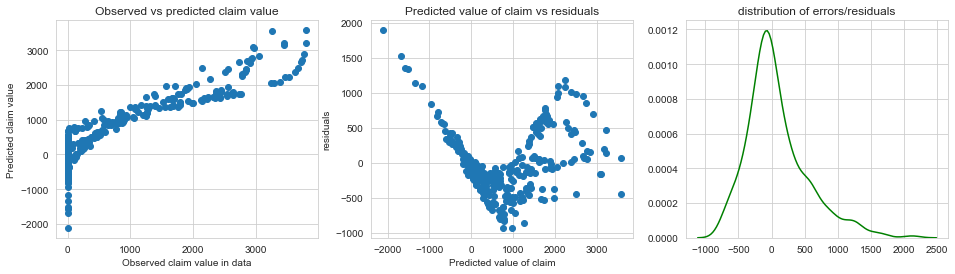

In [154]:
plt.figure(figsize=(16,4))
plt.subplot(131)
# plotting scatter plot between actual claim value and predicted claim value 
plt.scatter(y_valid, y_predicted)
plt.xlabel('Observed claim value in data')
plt.ylabel('Predicted claim value')
plt.title('Observed vs predicted claim value')

plt.subplot(132)
## scatter plot between predicted claim value and residuals
plt.scatter(y_predicted,delta_y)
plt.xlabel('Predicted value of claim')
plt.ylabel('residuals')
plt.title('Predicted value of claim vs residuals')

plt.subplot(133)
delta_y = y_valid -  y_predicted
sns.set_style('whitegrid')
# residual = actual -predicted. Calculating error and storing it in a variable called delta_y.
# plotting distribution of residuals using seaborn kde plot.
sns.kdeplot(np.array(delta_y),color='g')
plt.title('distribution of errors/residuals')
plt.show()

# RandomForestRegressor

In [155]:
## parameters for performing gridsearch
grid_parameters = { 
               
                    "regressor__n_estimators":    [10,20,50,70,100],  
                    "regressor__max_depth":        range(1,30,1),
                    "regressor__min_samples_leaf": range(1,10,1),
                    "regressor__max_leaf_nodes":   [2, 5,10]
            }


# Calling the function gridsearch with RandomForestRegressor,grid_parameters and Cross validator,saving the model in a variable.
RandomForestRegressor()
model = gridsearch(RandomForestRegressor(),grid_parameters,cv)


## printing best Parameter setting that gave the best results on the hold out data.
print('Best Parameters : {}\n'.format(model.best_params_))

## calculating R^2 score on training data using final estimator returned by gridsearch
training_score_randomReg = model.best_estimator_.score(X_train, y_train)
print('Training R^2    : {}\n'.format(training_score_randomReg))

## calculating R^2 score on validation data using final estimator returned by gridsearch
validation_score_randomReg = model.best_estimator_.score(X_valid, y_valid)
print('Validation R^2  : {}\n'.format(validation_score_randomReg))

## making predictions on Validation data using the best estimator
y_predicted = model.best_estimator_.predict(X_valid)

## Calculating the root mean square error
mse=np.sum(np.square(y_valid-y_predicted))/len(y_predicted)
RMSE_randomReg = np.sqrt(mse)
print('RMSE            :', RMSE_randomReg)

## storing the best estimator
RandomForest_BestEstimator = model.best_estimator_


results_training['RandomForestRegressor'] = [training_score_randomReg]
results_validation['RandomForestRegressor'] = [validation_score_randomReg]
results_RMSE['RandomForestRegressor'] = [RMSE_randomReg]

Fitting 10 folds for each of 3915 candidates, totalling 39150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | e

Best Parameters : {'regressor__max_depth': 24, 'regressor__max_leaf_nodes': 10, 'regressor__min_samples_leaf': 6, 'regressor__n_estimators': 50}

Training R^2    : 0.5872103902061914

Validation R^2  : 0.463634618658075

RMSE            : 789.2421842073259


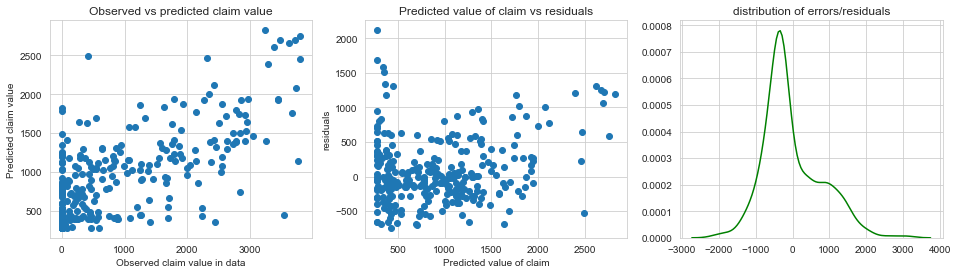

In [156]:
plt.figure(figsize=(16,4))
plt.subplot(131)
# plotting scatter plot between actual claim value and predicted claim value 
plt.scatter(y_valid, y_predicted)
plt.xlabel('Observed claim value in data')
plt.ylabel('Predicted claim value')
plt.title('Observed vs predicted claim value')

plt.subplot(132)
## scatter plot between predicted claim value and residuals
plt.scatter(y_predicted,delta_y)
plt.xlabel('Predicted value of claim')
plt.ylabel('residuals')
plt.title('Predicted value of claim vs residuals')

plt.subplot(133)
delta_y = y_valid -  y_predicted
sns.set_style('whitegrid')
# residual = actual -predicted. Calculating error and storing it in a variable called delta_y.
# plotting distribution of residuals using seaborn kde plot.
sns.kdeplot(np.array(delta_y),color='g')
plt.title('distribution of errors/residuals')
plt.show()

## MLP Regressor

In [308]:
## parameters for performing gridsearch
grid_parameters = {
    'regressor__hidden_layer_sizes':   np.arange(25,100,15),
    'regressor__activation' :          ['relu','logistic'],
    'regressor__learning_rate' :       ['constant', 'adaptive'],
    'regressor__learning_rate_init' :  [0.1,0.2,0.3, 0.4,0.5,0.6]
    
}

# Calling the function gridsearch with RandomForestRegressor,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(MLPRegressor(random_state=1,early_stopping=True,max_iter=5000),grid_parameters,cv)


## printing best Parameter setting that gave the best results on the hold out data.
print('Best Parameters : {}\n'.format(model.best_params_))

## calculating R^2 score on training data using final estimator returned by gridsearch
training_score_MLP = model.best_estimator_.score(X_train, y_train)
print('Training R^2    : {}\n'.format(training_score_MLP))

## calculating R^2 score on validation data using final estimator returned by gridsearch
validation_score_MLP = model.best_estimator_.score(X_valid, y_valid)
print('Validation R^2  : {}\n'.format(validation_score_MLP))

## making predictions on Validation data using the best estimator
y_predicted = model.best_estimator_.predict(X_valid)

## Calculating the root mean square error
mse=np.sum(np.square(y_valid-y_predicted))/len(y_predicted)
RMSE_MLP = np.sqrt(mse)
print('RMSE            :', RMSE_MLP)

## storing the best estimator
MLP_BestEstimator = model.best_estimator_


results_training['MLP Regressor'] = [training_score_MLP]
results_validation['MLP Regressor'] = [validation_score_MLP]
results_RMSE['MLP Regressor'] = [RMSE_MLP]

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.1min finished


Best Parameters : {'regressor__activation': 'logistic', 'regressor__hidden_layer_sizes': 70, 'regressor__learning_rate': 'constant', 'regressor__learning_rate_init': 0.1}

Training R^2    : 0.9797998872579452

Validation R^2  : 0.9843746942655459

RMSE            : 134.7082462040153


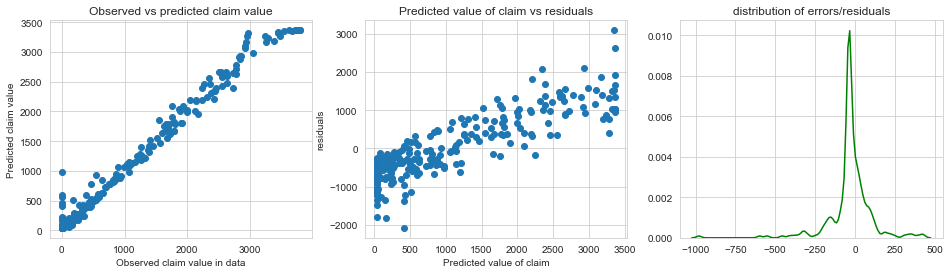

In [158]:
plt.figure(figsize=(16,4))
plt.subplot(131)
# plotting scatter plot between actual claim value and predicted claim value 
plt.scatter(y_valid, y_predicted)
plt.xlabel('Observed claim value in data')
plt.ylabel('Predicted claim value')
plt.title('Observed vs predicted claim value')

plt.subplot(132)
## scatter plot between predicted claim value and residuals
plt.scatter(y_predicted,delta_y)
plt.xlabel('Predicted value of claim')
plt.ylabel('residuals')
plt.title('Predicted value of claim vs residuals')

plt.subplot(133)
delta_y = y_valid -  y_predicted
sns.set_style('whitegrid')
# residual = actual -predicted. Calculating error and storing it in a variable called delta_y.
# plotting distribution of residuals using seaborn kde plot.
sns.kdeplot(np.array(delta_y),color='g')
plt.title('distribution of errors/residuals')
plt.show()

## Comparing the performance of different models built 

In [215]:
# Creating a dataframe with training_scores of all the models using results_training dictionary
training_scores = pd.DataFrame(results_training,columns=None).transpose()
training_scores.columns = ['Training R^2 score']
# Creating a dataframe with validation_scores of all the models using results_validation dictionary
validation_scores = pd.DataFrame(results_validation,columns=None).transpose()
validation_scores.columns = ['Validation R^2 score']

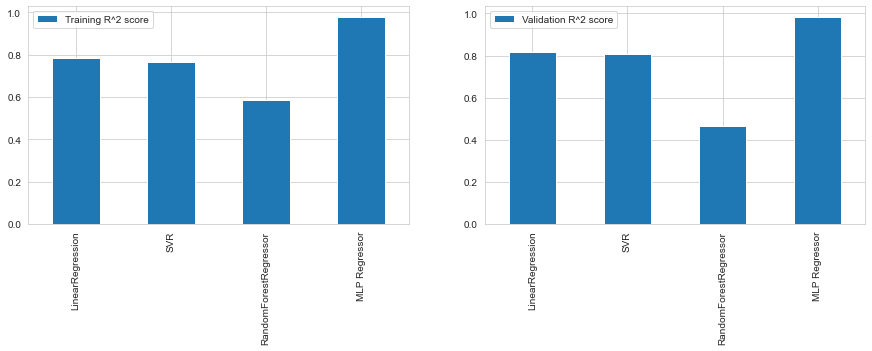

In [217]:
# Plotting the dataframes to compare the R^2 scores of all the models created
figure,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))

training_scores.plot(kind='bar', ax=ax1)
validation_scores.plot(kind='bar', ax=ax2)


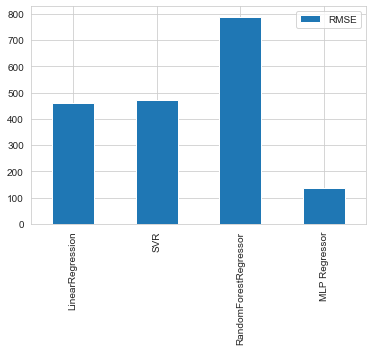

In [310]:
# Creating a dataframe with RMSE values of all the models using results_RMSE dictionary
RMSE_values = pd.DataFrame(results_RMSE,columns=None).transpose()
RMSE_values.columns = ['RMSE']
# plotting RMSE values of all the models
RMSE_values.plot(kind='bar')

## Predictions on Test Data

In [286]:
## Reading the given test dataset into pandas dataframe
test_data = pd.read_csv("CE802_P3_Data/CE802_P3_Test.csv")

## Displaying the first 5 rows of data
test_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN


In [287]:
## Dropping the Target column from test data
test = test_data.drop(columns='Target')

In [288]:
## Predicting the values of Target column in  test data using the best model chosen 
## MLP Regressor showed high R^2: 0.984 and low RMSE : 134.7082462040153 so this model is chosen to do predictions on test data.
Target_predictions = MLP_BestEstimator.predict(test)
Target_predictions

array([ 406.29693926,   38.83426363, 3367.20568696, ...,  588.54591632,
         38.73057205,   39.55187201])

In [278]:
# alternatively we can save the model to the local file system for deployment
import pickle
filename = 'Regression_model.pickle'
pickle.dump(MLP_BestEstimator, open(filename, 'wb'))

In [279]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
predicted_values=loaded_model.predict(test) 
predicted_values

array([ 406.29693926,   38.83426363, 3367.20568696, ...,  588.54591632,
         38.73057205,   39.55187201])

In [289]:
##  Adding the 'Target' column to test dataframe and assigning the predictions to 'Class' column.
test['Target'] = Target_predictions

In [290]:
## Visualizing first 5 rows of test dataframe
test.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,406.296939
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,38.834264
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,3367.205687
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,2446.518965
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,38.733925


In [291]:
## Converting test dataframe to csv file and storing it with file name 'CE802_P3_Test.csv'
test.to_csv("CE802_P3_Test.csv",index=False)

In [292]:
pd.read_csv("CE802_P3_Test.csv").head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,406.296939
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,38.834264
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,3367.205687
